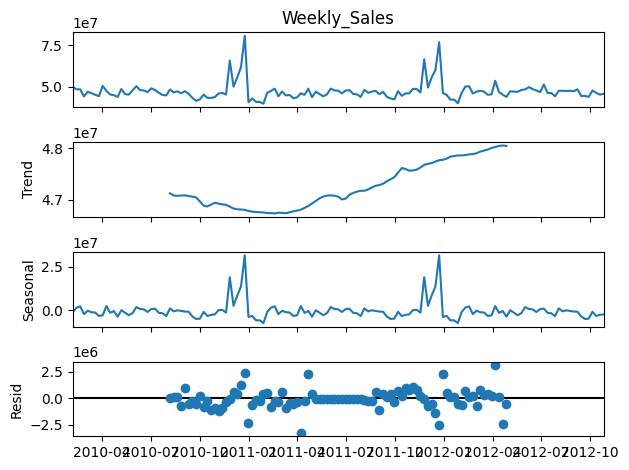

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("../data/raw/demand_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate weekly demand
weekly_demand = (
    df.groupby('Date')['Weekly_Sales']
    .sum()
    .reset_index()
)

# Set date as index
weekly_demand.set_index('Date', inplace=True)

# Seasonal decomposition
decomposition = seasonal_decompose(
    weekly_demand['Weekly_Sales'],
    model='additive',
    period=52   # weekly retail seasonality
)

# Plot components
decomposition.plot()
plt.show()
